In [1]:
import numpy as np

# 加载数据
X = np.load('checkboard_plot_5/X.npy')  # 黑色区域
y = np.load('checkboard_plot_5/y.npy')      # 红色区域

# 合并特征和标签
features = X
targets = y

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('checkboard_plot_5/features.npy', features)  # 保存打乱的特征数组
np.save('checkboard_plot_5/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (11000, 2)
打乱后的标签数组形状： (11000,)
前5个特征：
 [[-0.01261576  0.0905048 ]
 [ 0.92134715  1.49060794]
 [ 1.99165457  0.23514581]
 [-0.31575105  2.25010183]
 [ 0.41496731  1.9850093 ]]
前5个标签： [0 0 0 0 0]


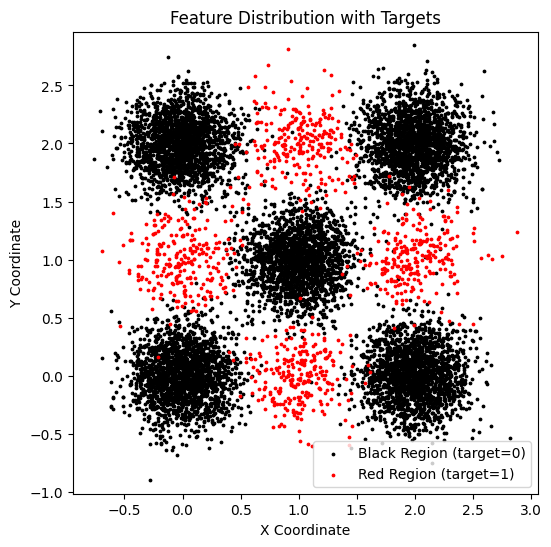

In [2]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('checkboard_plot_5/features.npy')
y = np.load('checkboard_plot_5/targets.npy')

X_test = np.load('checkboard_plot_5/X_test.npy')
y_test = np.load('checkboard_plot_5/y_test.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=3, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=3, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



Begin to train.... - 2024-12-14 19:31:14,888 - DualGranularBalancedDeepForest
the shape of training samples: (11000, 2) - 2024-12-14 19:31:14,889 - DualGranularBalancedDeepForest
use gmean as training evaluation - 2024-12-14 19:31:14,890 - DualGranularBalancedDeepForest
stacking: False, save model: False - 2024-12-14 19:31:14,890 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-14 19:31:14,891 - DualGranularBalancedDeepForest
The shape of x_train is (11000, 2) - 2024-12-14 19:31:14,891 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9841, f1_score=0.9506, auc=0.9821, gmean=0.9379, sen=0.8850, spe=0.9940, aupr=0.9497 - 2024-12-14 19:31:17,930 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9800, f1_score=0.9398, auc=0.9866, gmean=0.9406, sen=0.8950, spe=0.9885, aupr=0.9229 - 2024-12-14 19:31:17,937 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9732, f1_score=0.9160, auc=0.9905, gmean=0.8978, sen=0.8150, spe=0.9890, aupr=0.9281 - 2024-12-14 19:31:17,943 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9782, f1_score=0.9312, auc=0.9791, gmean=0.9104, sen=0.8350, spe=0.9925, aupr=0.9048 - 2024-12-14 19:31:17,950 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9782, f1_score=0.9325, auc=0.9830, gmean=0.9203, sen=0.8550, spe=0.9905, aupr=0.9231 - 2024-12-14 19:31:17,956 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 0
num_layers: 1


layer_1, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9764, f1_score=0.9251, auc=0.9787, gmean=0.9019, sen=0.8200, spe=0.9920, aupr=0.9073 - 2024-12-14 19:31:35,112 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9741, f1_score=0.9214, auc=0.9677, gmean=0.9182, sen=0.8550, spe=0.9860, aupr=0.8652 - 2024-12-14 19:31:35,118 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9759, f1_score=0.9249, auc=0.9720, gmean=0.9092, sen=0.8350, spe=0.9900, aupr=0.9047 - 2024-12-14 19:31:35,126 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9718, f1_score=0.9140, auc=0.9580, gmean=0.9071, sen=0.8350, spe=0.9855, aupr=0.8613 - 2024-12-14 19:31:35,132 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9836, f1_score=0.9498, auc=0.9813, gmean=0.9425, sen=0.8950, spe=0.9925, aupr=0.9342 - 2024-12-14 19:31:35,139 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 1
num_layers: 2


layer_2, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9864, f1_score=0.9582, auc=0.9795, gmean=0.9511, sen=0.9100, spe=0.9940, aupr=0.9429 - 2024-12-14 19:31:58,863 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9795, f1_score=0.9388, auc=0.9728, gmean=0.9427, sen=0.9000, spe=0.9875, aupr=0.9052 - 2024-12-14 19:31:58,868 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9814, f1_score=0.9440, auc=0.9805, gmean=0.9461, sen=0.9050, spe=0.9890, aupr=0.9334 - 2024-12-14 19:31:58,874 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9832, f1_score=0.9508, auc=0.9869, gmean=0.9658, sen=0.9450, spe=0.9870, aupr=0.9432 - 2024-12-14 19:31:58,880 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9836, f1_score=0.9514, auc=0.9961, gmean=0.9590, sen=0.9300, spe=0.9890, aupr=0.9405 - 2024-12-14 19:31:58,886 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 2
num_layers: 3


layer_3, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9864, f1_score=0.9595, auc=0.9946, gmean=0.9675, sen=0.9450, spe=0.9905, aupr=0.9584 - 2024-12-14 19:32:21,939 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9891, f1_score=0.9670, auc=0.9832, gmean=0.9666, sen=0.9400, spe=0.9940, aupr=0.9541 - 2024-12-14 19:32:21,948 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9823, f1_score=0.9458, auc=0.9737, gmean=0.9394, sen=0.8900, spe=0.9915, aupr=0.9161 - 2024-12-14 19:32:21,957 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9859, f1_score=0.9577, auc=0.9721, gmean=0.9603, sen=0.9300, spe=0.9915, aupr=0.9173 - 2024-12-14 19:32:21,966 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9841, f1_score=0.9513, auc=0.9891, gmean=0.9451, sen=0.9000, spe=0.9925, aupr=0.9326 - 2024-12-14 19:32:21,975 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 3
num_layers: 4


layer_4, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9855, f1_score=0.9556, auc=0.9831, gmean=0.9506, sen=0.9100, spe=0.9930, aupr=0.9481 - 2024-12-14 19:32:46,459 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9850, f1_score=0.9539, auc=0.9773, gmean=0.9456, sen=0.9000, spe=0.9935, aupr=0.9340 - 2024-12-14 19:32:46,465 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9850, f1_score=0.9530, auc=0.9829, gmean=0.9360, sen=0.8800, spe=0.9955, aupr=0.9524 - 2024-12-14 19:32:46,471 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9877, f1_score=0.9623, auc=0.9882, gmean=0.9542, sen=0.9150, spe=0.9950, aupr=0.9632 - 2024-12-14 19:32:46,476 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9850, f1_score=0.9547, auc=0.9772, gmean=0.9551, sen=0.9200, spe=0.9915, aupr=0.9336 - 2024-12-14 19:32:46,482 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 4
num_layers: 5
last_layer_index 3
last_layer_index 3
UncertaintyAwareDeepForest - Accuracy: 0.9777
UncertaintyAwareDeepForest - AUC: 0.9929
UncertaintyAwareDeepForest - AUPR: 0.9468
UncertaintyAwareDeepForest - Sensitivity: 0.8500
UncertaintyAwareDeepForest - Specificity: 0.9905
UncertaintyAwareDeepForest - G-Mean: 0.9176
UncertaintyAwareDeepForest - F1 Macro: 0.9309


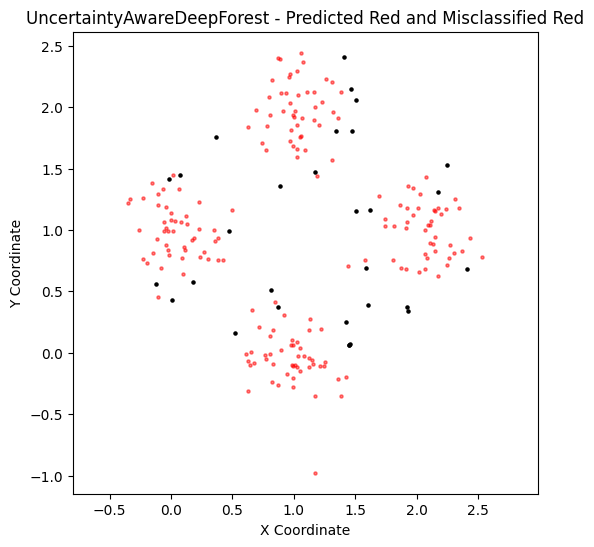

In [7]:
import os
# 配置输出文件夹
output_dir = "checkboard_plot_5"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Training UnderBagging...
UnderBagging - Accuracy: 0.9755
UnderBagging - AUC: 0.9887
UnderBagging - AUPR: 0.9246
UnderBagging - Sensitivity: 0.9550
UnderBagging - Specificity: 0.9775
UnderBagging - G-Mean: 0.9662
UnderBagging - F1 Macro: 0.9313
Training BalancedRandomForest...
BalancedRandomForest - Accuracy: 0.9641
BalancedRandomForest - AUC: 0.9879
BalancedRandomForest - AUPR: 0.9236
BalancedRandomForest - Sensitivity: 0.9600
BalancedRandomForest - Specificity: 0.9645
BalancedRandomForest - G-Mean: 0.9622
BalancedRandomForest - F1 Macro: 0.9047


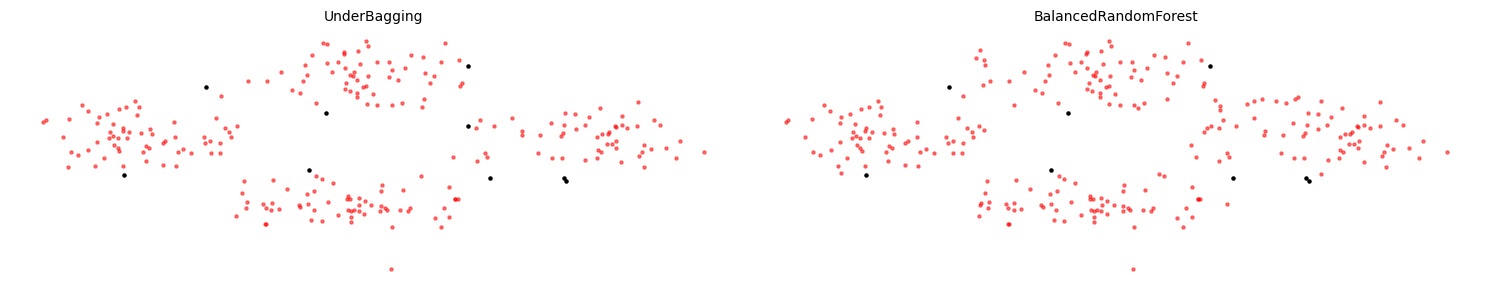

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os
from catboost import CatBoostClassifier

# 配置输出文件夹
output_dir = "checkboard_plot_5"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    # 'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    # 'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    # 'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    # 'RUSBoost': RUSBoostClassifier(n_estimators=50),
    'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    # 'AdaCost': AdaCostClassifier(n_estimators=50),
    # 'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    # 'AsymBoost': AsymBoostClassifier(n_estimators=50),
    # 'CatBoost': CatBoostClassifier(n_estimators=50, verbose=0, random_seed=421),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training OverBagging...
OverBagging - Accuracy: 0.9777
OverBagging - AUC: 0.9779
OverBagging - AUPR: 0.9115
OverBagging - Sensitivity: 0.8500
OverBagging - Specificity: 0.9905
OverBagging - G-Mean: 0.9176
OverBagging - F1 Macro: 0.9309
Training SMOTEBoost...
SMOTEBoost - Accuracy: 0.7855
SMOTEBoost - AUC: 0.7800
SMOTEBoost - AUPR: 0.1787
SMOTEBoost - Sensitivity: 0.7550
SMOTEBoost - Specificity: 0.7885
SMOTEBoost - G-Mean: 0.7716
SMOTEBoost - F1 Macro: 0.6300
Training OverBoost...
OverBoost - Accuracy: 0.7786
OverBoost - AUC: 0.7714
OverBoost - AUPR: 0.1773
OverBoost - Sensitivity: 0.7300
OverBoost - Specificity: 0.7835
OverBoost - G-Mean: 0.7563
OverBoost - F1 Macro: 0.6202
Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.7364
KmeansSMOTEBoost - AUC: 0.6623
KmeansSMOTEBoost - AUPR: 0.1416
KmeansSMOTEBoost - Sensitivity: 0.6300
KmeansSMOTEBoost - Specificity: 0.7470
KmeansSMOTEBoost - G-Mean: 0.6860
KmeansSMOTEBoost - F1 Macro: 0.5702
Training SMOTEBagging...
SMOTEBagging - 

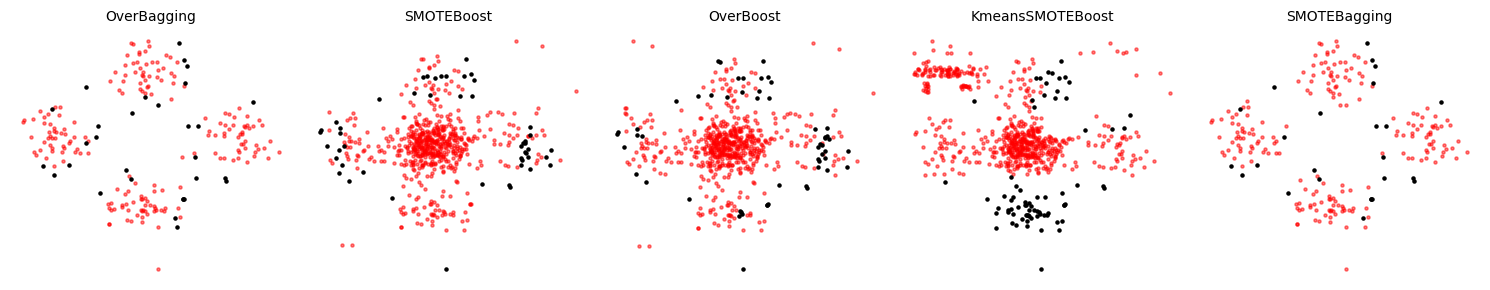

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "checkboard_plot_5"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)
    
    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()
